# Présentation du projet Twitter us airline sentiment (NLP)

Le but est de connaître les sentiments des personnes par leurs tweets envers les compagnies aériennes américaines. 
Les données de Twitter ont été extraites de février 2015 et les contributeurs ont été invités à classer les tweets positifs, négatifs et neutres, puis à catégoriser les raisons négatives (telles que "vol tardif" ou "service dur").
La base de données indique si le sentiment des tweets de cet ensemble était positif, neutre ou négatif pour six compagnies aériennes américaines (Delta, Southwest, united, US airways, Virgin america, American,)

# Recuperer les tweets et préparation des données

In [1]:
import pandas as pd #Importation des données

In [2]:
Data = pd.read_csv("Tweets.csv")

In [3]:
Data.tail(n=7) #Affiche 7 dernières colonne 
Data.head(n=5) #Affiche 5 première lignes

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
Data.columns #Affichage colonnes
Data.info() #Affichage colonnes + nombres de données + types de données 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
Data['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

In [6]:
Tweet = Data.text
Tweet #Affiche Serie de Tweet

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [7]:
#for i in Tweet:
    #print(i) #test : affichage tweet

In [11]:
tweets = [i.lower() for i in Tweet]
#tweets

# Nettoyage données

In [12]:
str_tweets = ' '.join(tweets) #La méthode de chaîne join () renvoie une chaîne en joignant tous les éléments d'un itérable, séparés par un séparateur de chaîne.
#str_tweets

In [13]:
import snowballstemmer #Réduire les différence grammaticales

stemmer = snowballstemmer.stemmer('english')
s = stemmer.stemWords(str_tweets.split())
#print(s)

In [14]:
str_tweets = ' '.join(s)

In [15]:
import nltk #Traitement de langage
nltk.word_tokenize(str_tweets) #créer une liste dont les virgules séparents les mots et ponctuations

['@',
 'virginamerica',
 'what',
 '@',
 'dhepburn',
 'said',
 '.',
 '@',
 'virginamerica',
 'plus',
 'you',
 "'",
 'v',
 'ad',
 'commerci',
 'to',
 'the',
 'experience',
 '...',
 'tacky',
 '.',
 '@',
 'virginamerica',
 'i',
 'did',
 "n't",
 'today',
 '...',
 'must',
 'mean',
 'i',
 'need',
 'to',
 'take',
 'anoth',
 'trip',
 '!',
 '@',
 'virginamerica',
 'it',
 'realli',
 'aggress',
 'to',
 'blast',
 'obnoxi',
 '``',
 'entertainment',
 "''",
 'in',
 'your',
 'guest',
 'face',
 '&',
 'amp',
 ';',
 'they',
 'have',
 'littl',
 'recours',
 '@',
 'virginamerica',
 'and',
 'it',
 'a',
 'realli',
 'big',
 'bad',
 'thing',
 'about',
 'it',
 '@',
 'virginamerica',
 'serious',
 'would',
 'pay',
 '$',
 '30',
 'a',
 'flight',
 'for',
 'seat',
 'that',
 'did',
 "n't",
 'have',
 'this',
 'playing',
 '.',
 'it',
 'realli',
 'the',
 'onli',
 'bad',
 'thing',
 'about',
 'fli',
 'va',
 '@',
 'virginamerica',
 'yes',
 ',',
 'near',
 'everi',
 'time',
 'i',
 'fli',
 'vx',
 'this',
 '“',
 'ear',
 'worm',
 

In [16]:
tok_tweet = nltk.RegexpTokenizer(r'\w+').tokenize(str_tweets)
#tok_tweet

On a enlevé les ponctuations et les caractéres spéciaux dans notre liste.

In [17]:
from nltk.corpus import stopwords #Enlever les mots vides
stopwords_list = stopwords.words('english')
clean_words = [word for word in tok_tweet if word not in stopwords_list] #Suppression des mots vides
#clean_words

On a enlevé les mots vides dans notre liste (What, to, the...) car ils n'auront pas d'impact dans notre résultat de prédiction et on aura moins de données en entrée.

In [18]:
Compagnie = [ "united", "usairway", "americanair", "southwestair", "sdelta", "virginamerica"] #Affichage des compagnies

Le nom des compagnies aériennes peuvent également être supprimées en entrée.

In [19]:
new_clean_words = [i for i in clean_words if i not in Compagnie] #Affichages mots sans les compagnies
#new_clean_words

# Frequence de mots

In [20]:
from collections import Counter #compte la fréquence des mots
counts = Counter(new_clean_words)
#counts

Text(0.5, 1.0, 'Most Common Words used by Edgar Allen Poe')

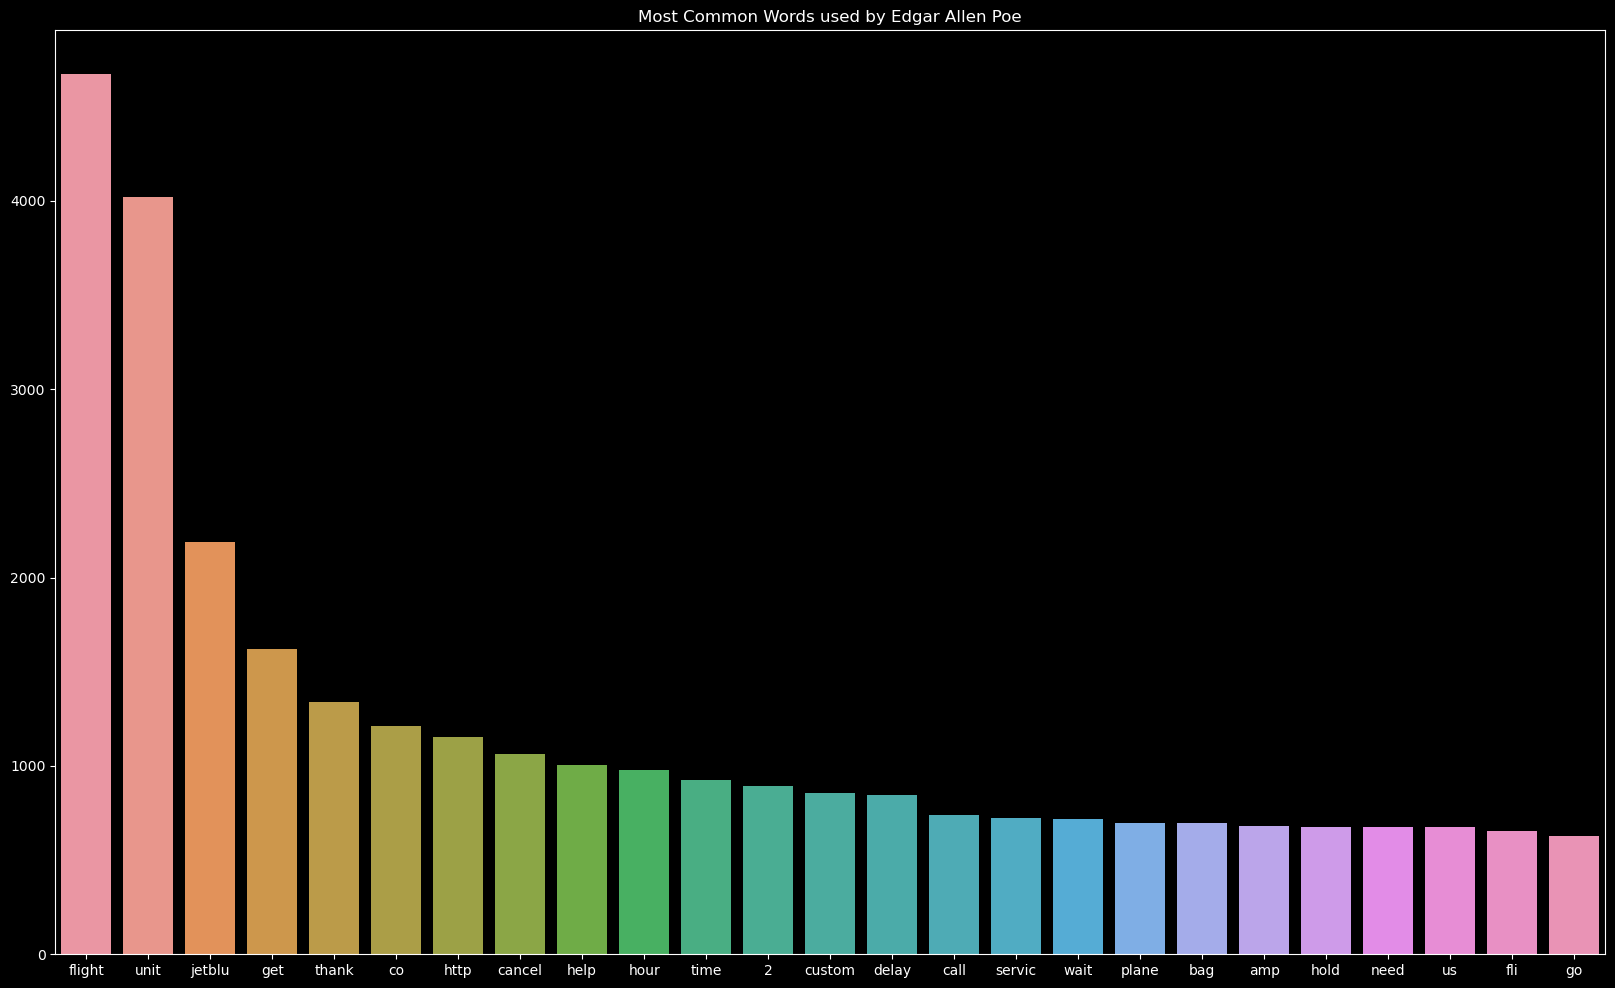

In [21]:
import seaborn as sns #affichage graphique
import matplotlib.pyplot as plt
eap_common_words = [word[0] for word in counts.most_common(25)]
eap_common_counts = [word[1] for word in counts.most_common(25)]

plt.style.use('dark_background')
plt.figure(figsize=(20,12))

sns.barplot(x=eap_common_words, y=eap_common_counts)
plt.title('Most Common Words used by Edgar Allen Poe')

In [22]:
str_new_clean_words = ".".join(new_clean_words)
#str_new_clean_words

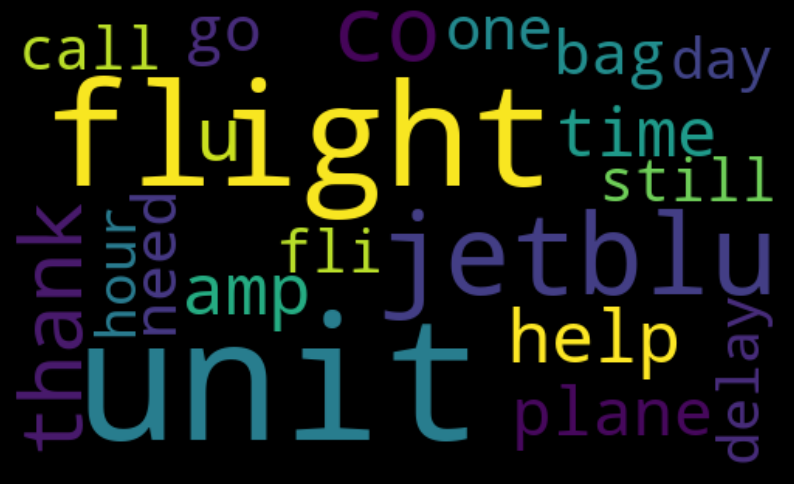

In [23]:
from wordcloud import WordCloud,STOPWORDS
wordcloud = WordCloud(width=500, height=300,
                      random_state=21, max_font_size=110, max_words =20).generate(str_new_clean_words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');
WordCloud()

Remarque : Pour le nettoyge des données certains mots sans importance peuvent être supprimé comme AMP,co,us...

# Analyse de notre Target 

Text(0.5, 1.0, 'Count of Moods')

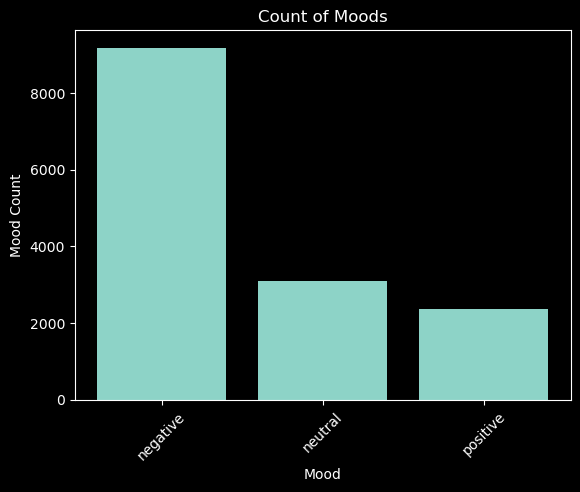

In [24]:
import matplotlib.pyplot as plt #Affichage graphique
Mood_count=Data['airline_sentiment'].value_counts()
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

Nos données ne sont pas équilibrées on a tendance à avoir plus de tweets négatifs par rapport aux tweets neutres et positifs.

In [25]:
Data['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

On peut pousser l'analyse plus loin et regarder la fréquence des tweets postifs, négatifs et neutres pour chaque compagnie.

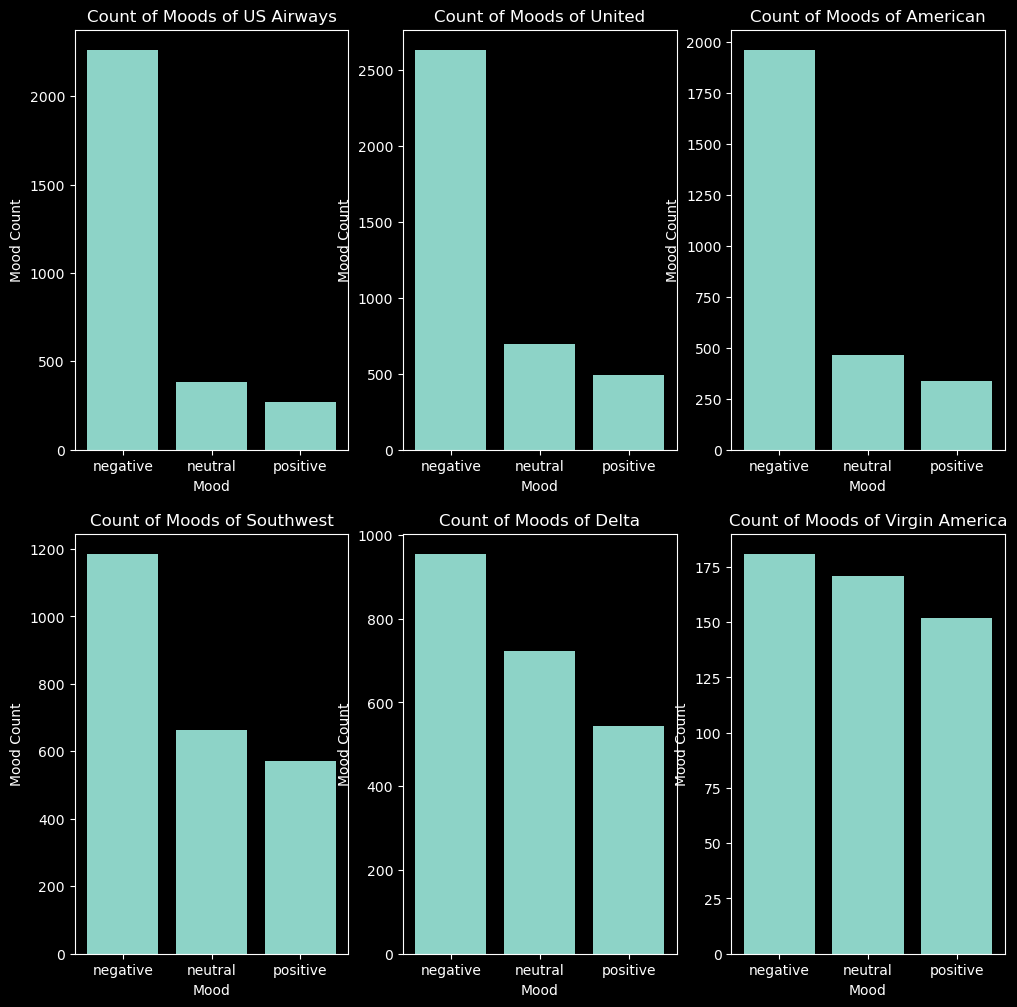

In [26]:
def plot_sub_sentiment(Airline):
    df=Data[Data['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

Virgin America fait partie de la compagnie où la fréquence des tweets postifs, négatifs et neutres sont les plus équilibrés.

US Airways fait partie de la compagnie où la fréquence des tweets postifs, négatifs et neutres sont les plus instables.

# Transformer mots en vecteur (Bag of word)

On va utiliser les 200 mots les plus fréquents avec la librairie "heap"

In [27]:
import heapq
most_freq = heapq.nlargest(200, counts, key=counts.get)
most_freq

['flight',
 'unit',
 'jetblu',
 'get',
 'thank',
 'co',
 'http',
 'cancel',
 'help',
 'hour',
 'time',
 '2',
 'custom',
 'delay',
 'call',
 'servic',
 'wait',
 'plane',
 'bag',
 'amp',
 'hold',
 'need',
 'us',
 'fli',
 'go',
 'one',
 'still',
 'whi',
 'tri',
 'would',
 'gate',
 'back',
 'book',
 'v',
 'pleas',
 'day',
 'make',
 'got',
 'check',
 'seat',
 'phone',
 'like',
 'ani',
 'today',
 'late',
 '3',
 'chang',
 'airlin',
 'miss',
 'agent',
 'know',
 'ticket',
 'take',
 'flightl',
 'work',
 'way',
 'thanks',
 'travel',
 'airport',
 'r',
 '4',
 'guy',
 '1',
 'u',
 'great',
 'want',
 'onli',
 'say',
 'becaus',
 'never',
 'even',
 'weather',
 'board',
 'tomorrow',
 'last',
 'good',
 '5',
 'home',
 'love',
 'look',
 'see',
 'use',
 'minut',
 'min',
 'dm',
 'w',
 'email',
 'let',
 'new',
 'service',
 'sit',
 'told',
 'anoth',
 'first',
 'veri',
 'problem',
 'peopl',
 'number',
 'could',
 'connect',
 'ever',
 'crew',
 'lost',
 'due',
 'yes',
 'worst',
 'realli',
 'rebook',
 'hope',
 'next

Notre most_freq contient les 200 mots les plus utilisés dans le corpus : si un des mots est présent dans la phrase 1 sera ajouté 0 sinon

In [28]:
sentence_vectors = []
for sentence in tweets:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [29]:
sentence_vectors = np.asarray(sentence_vectors)

In [30]:
sentence_vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

Nous avons maintenant notre sac de mots composé de 0 et de 1

In [31]:
#from keras.utils.np_utils import to_categorical #Convertit un vecteur de classe (entiers) en matrice de classe binaire.
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y_train_le = le.fit_transform(Data.airline_sentiment)
y_train_oh = to_categorical(y_train_le)

print('"{}" is converted into {}'.format(Data.airline_sentiment[4], y_train_le[4]))
print('"{}" is converted into {}'.format(y_train_le[4], y_train_oh[4]))


"negative" is converted into 0
"0" is converted into [1. 0. 0.]


Negative : 0 donne [1.0.0]

Neutre : 1 donne [0.1.0]

Positif : 2 donne [0.0.1]

# Séparation des données

In [32]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(sentence_vectors, y_train_oh, test_size=0.1, random_state = 1)

In [33]:
y_test.shape[0]

1464

In [34]:
assert x_test.shape[0] == y_test.shape[0]
assert X_train.shape[0] == Y_train.shape[0]

print(" taille de notre données de validation", x_test.shape)

 taille de notre données de validation (1464, 200)


# Création de modèle Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,Y_train)

RandomForestClassifier()

In [36]:
#import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_predict_rf = model_rf.predict(x_test)
cf = confusion_matrix(y_test.argmax(axis=1), y_predict_rf.argmax(axis=1))
print(cf)
print("accuracy score", accuracy_score(y_test,y_predict_rf))

[[828  75  29]
 [180  98  24]
 [ 94  31 105]]
accuracy score 0.671448087431694


<Axes: >

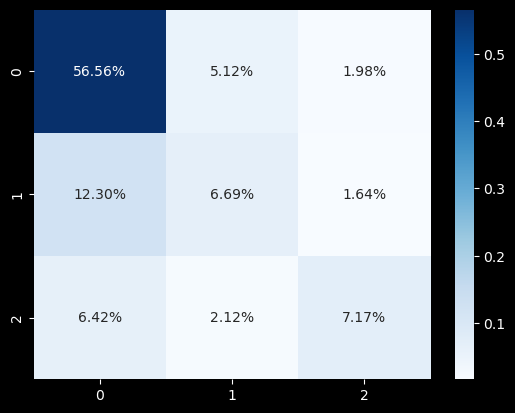

In [37]:
sns.heatmap(cf/np.sum(cf), annot=True,fmt='.2%', cmap='Blues')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       932
           1       0.48      0.32      0.39       302
           2       0.66      0.46      0.54       230

   micro avg       0.72      0.67      0.70      1464
   macro avg       0.64      0.54      0.58      1464
weighted avg       0.70      0.67      0.68      1464
 samples avg       0.67      0.67      0.67      1464



C:\Users\flori\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Création du modéle de réseau de neurone

In [39]:
from keras import models
from keras import layers
from keras import regularizers

base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(200,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary() 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                12864     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 17219 (67.26 KB)
Trainable params: 17219 (67.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , Y_train
                       , epochs= 20
                       , batch_size= 512
                       , validation_data=(x_test, y_test)
                       , verbose=0)
    
    return history

In [41]:
base_history = deep_model(base_model)

In [42]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, 20 + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

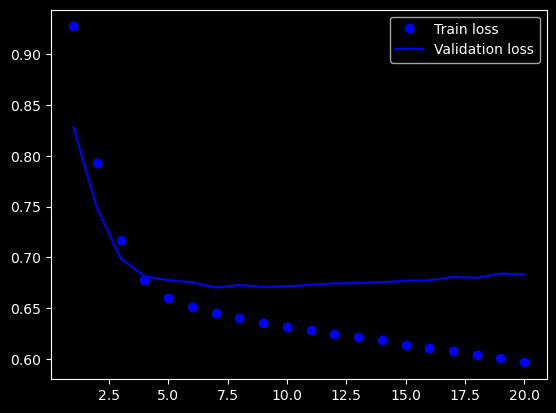

In [43]:
eval_metric(base_history, 'loss') 

Notre fonction de perte et notre fonction de validation est ni trop proche, ni trop éloignée. On a pas de surapprentissage ou de surapprentissage des données.

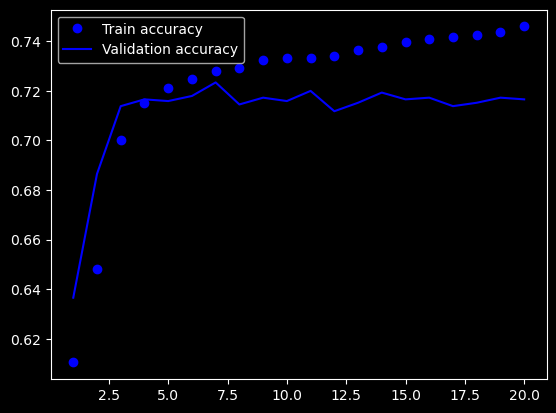

In [44]:
eval_metric(base_history, 'accuracy')

In [45]:
def test_model(model):
    results = model.evaluate(x_test, y_test) 
    return results

In [46]:
base_results = test_model(base_model)
print('/n')
print('Test accuracy of baseline model: {0:.2f}%'.format(base_results[1]*100))

46/46 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.7165
/n
Test accuracy of baseline model: 71.65%


# LLM huggling face 

In [55]:
from transformers import pipeline

# Charger le DataFrame
df = pd.DataFrame(Data["text"])

C:\Users\flori\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [61]:
# Charger un pipeline de classification de Hugging Face
classifier = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Fonction pour obtenir la note du commentaire
def get_score(comment):
    result = classifier(comment)
    # Extraire le label (par ex. "5 stars", "4 stars", etc.) et convertir en score de 1 à 5
    label = result[0]['label']
    score = int(label.split()[0])  # Supposant que le label est de la forme "5 stars", "4 stars", etc.
    return score

# Appliquer la fonction à chaque commentaire du DataFrame
df['score'] = df['text'].apply(get_score)

print(df)

                                                    text  score
0                    @VirginAmerica What @dhepburn said.      5
1      @VirginAmerica plus you've added commercials t...      5
2      @VirginAmerica I didn't today... Must mean I n...      1
3      @VirginAmerica it's really aggressive to blast...      4
4      @VirginAmerica and it's a really big bad thing...      1
...                                                  ...    ...
14635  @AmericanAir thank you we got on a different f...      5
14636  @AmericanAir leaving over 20 minutes Late Flig...      1
14637  @AmericanAir Please bring American Airlines to...      1
14638  @AmericanAir you have my money, you change my ...      1
14639  @AmericanAir we have 8 ppl so we need 2 know h...      3

[14640 rows x 2 columns]
